In [1]:
#Estudo de caso 5 do curso de Introduação à Ciência de Dados Aplicada à Cibersegurança

#Importando bibliotecas básicas

import numpy as np # vetores e matrizes 
import pandas as pd # processamento dos dados, arquivo CSV I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exais-sms-spam-dataset/ExAIS_SMS.csv
/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
# Importando a base de dados para o pandas

sms = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
sms.label = sms.label.map({"ham":0, "spam":1})

In [4]:
# mais casos negativos (ham) que positivos (spams) 
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [5]:
#Dividindo a base em treino e teste
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(sms.message, 
                                                                            sms.label, 
                                                                            test_size=0.2)

In [6]:
# Criando o documento de treino

from sklearn.feature_extraction.text import CountVectorizer

couvec = CountVectorizer()
couvec.fit(features_train)

CountVectorizer()

In [7]:
# número de características ou tokens
trained_features = couvec.get_feature_names()
print("Número de características vetorizadas:", len(trained_features))
print("Exemplos de características treinadas:", trained_features[1:10])

Número de características vetorizadas: 7795
Exemplos de características treinadas: ['000', '008704050406', '0089', '0121', '01223585334', '02', '0207', '02072069400', '02073162414']


In [8]:
# tokenized train documents

dtm_train = couvec.fit_transform(features_train)
print("Shape of dtm_train:", dtm_train.shape)
print(dtm_train[0:2]) # first two rows of sparse matrix

Shape of dtm_train: (4457, 7795)
  (0, 2008)	1
  (0, 6293)	1
  (0, 3531)	1
  (0, 1912)	1
  (0, 7737)	1
  (0, 3368)	1
  (0, 1285)	1
  (0, 7553)	1
  (0, 960)	1
  (0, 2336)	1
  (0, 1291)	1
  (1, 3343)	1
  (1, 4779)	1
  (1, 7711)	1
  (1, 4457)	1


In [9]:
# tokenized test documents

dtm_test = couvec.transform(features_test)
print("Shape of dtm_test:", dtm_test.shape)

Shape of dtm_test: (1115, 7795)


In [10]:
# Construíndo e avaliando o modelo 

# Multimodal Naive Bayes 
# O classificador multimodal Naive Bays é útil para classificar características discretas. 
# (e.g., número de palavras para classificação de textos). 
# A distribuição multimodal requer geralmente contadores inteiros como features.

# Importando e instanciando o modelo Nayve Bayes Multimodal
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [11]:
# Treinando o modelo

nb.fit(dtm_train, labels_train)

MultinomialNB()

In [12]:
# Fazendo predições

labels_pred = nb.predict(dtm_test)

In [13]:
# Acurácia
from sklearn import metrics
metrics.accuracy_score(labels_test, labels_pred)

0.9838565022421525

In [14]:
# Criando a matrix de confusão para precisão e recall (essas são duas outrss métricas de avaliação) 
metrics.confusion_matrix(labels_test, labels_pred)

array([[968,   2],
       [ 16, 129]])

In [15]:
# Percentagem do total de spams detectados i.e.recall
print("Recall:", metrics.recall_score(labels_test, labels_pred))

# Percentagem das predições positivas (spams) corretas, i.e. precisão
print("Precisão:", metrics.precision_score(labels_test, labels_pred))

Recall: 0.8896551724137931
Precisão: 0.9847328244274809


In [16]:
print("Ordem das classes no predict_proba:", nb.classes_)
print("Exemplos de probabilidades de classes:", nb.predict_proba(dtm_test)[0])


Ordem das classes no predict_proba: [0 1]
Exemplos de probabilidades de classes: [9.99615437e-01 3.84563357e-04]


In [17]:
# Uma vez que somente ~15% dos rótulos são positivos (spam), a curva precisão-recall é mais informativa que
# a curva ROC

labels_prob = nb.predict_proba(dtm_test)[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, labels_prob)

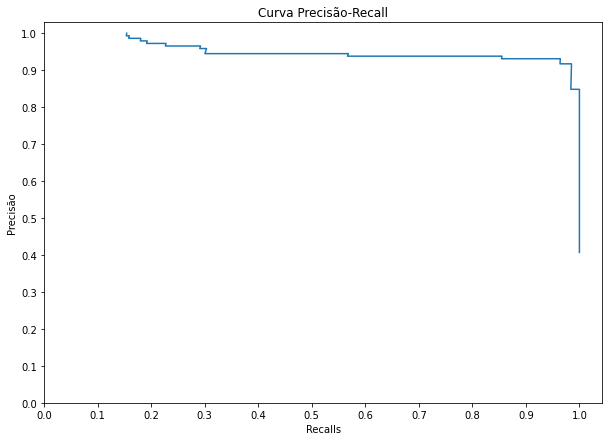

In [18]:
# Plotando a curva precisão-recall 

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(precisions[:-1], recalls[:-1])
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall")
plt.show()

### Nome: André Luiz Moreira Dutra
### Matrícula: 2019006345

# A Base ExAIS_SPAM
Primeiramente, vamos aumentar a nossa base de hams e spams e com isso permitir uma melhor classificação dos resultados.

Para isso, à base original vamos adicionar dados da base ExAIS de mensagens de SMS, disponíveis em:

> https://github.com/AbayomiAlli/SMS-Spam-Dataset

A base contém mensagens enviadas e recebidas por 20 usuários, classificadas como ham ou spam, dentre outras informações.

O tratamento da base foi feito da seguinte forma:
1. Primeiro, os dados de todos os usuários foram unidos.
2. Em seguida, os dados das mensagens e da classificação em ham e spam foram selecionados, e os demais descartados.
3. Por fim, mensagens enviadas e classificadas como spam foram eliminadas dos dados.
   1. Isso foi feito pois elas correspondiam a respostas dos usuários a números de spam como "CANCEL", "STOP".
   2. Sendo assim, elas não correspondiam ao padrão de mensagens de spam que queremos detectar.

In [19]:
sms_exais = pd.read_csv("/kaggle/input/exais-sms-spam-dataset/ExAIS_SMS.csv")
sms_exais.sample(5)

,label,message
3546,spam,If you cannot find the brighter side of life p...
2225,spam,"Dear Valued Customer, Welcome to Airtel! The N..."
135,ham,70XXXXX653
4925,spam,Please call Buy GOtv Decoder + 1 Month GOtv Pl...
730,ham,TANKX 4 being a calumniator and besmirchous nd...


# A Nova Base

Vamos agora unir a base ExAIS à já utilizada e formar uma nova base mais robusta e com menor diferença entre hams e spams:

In [20]:
sms_uci = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                      names=["label", "message"])

sms = pd.concat([sms_exais, sms_uci])
sms.label = sms.label.map({"ham":0, "spam":1})
sms.sample(5)

,label,message
2978,1,"Xmas Offer! Latest Motorola, SonyEricsson & No..."
1535,1,You have won a Nokia 7250i. This is what you g...
1269,0,"Tee hee. Off to lecture, cheery bye bye."
292,0,Oops. 4 got that bit.
2598,0,Pls reply


Observe como os novos dados têm uma proporção ligeiramente maior de spams que antes:

In [21]:
old_hams, old_spams = sms_uci.label.value_counts()
print('Proporção antiga de spams: {:.2f}%'.format(100*old_spams/(old_hams+old_spams)))

hams, spams = sms.label.value_counts()
print('Proporção nova de spams:   {:.2f}%'.format(100*spams/(hams+spams)))

Proporção antiga de spams: 13.41%
Proporção nova de spams:   27.42%


# Tratamento dos Dados
Vamos agora separar os dados em treino e teste e vetorizar os textos das mensagens:

In [22]:
features_train, features_test, labels_train, labels_test = train_test_split(sms.message, sms.label, test_size=0.2, random_state = 52)
couvec = CountVectorizer()
couvec.fit(features_train)
dtm_train = couvec.fit_transform(features_train)
dtm_test = couvec.transform(features_test)

# Treinamento e Teste dos Modelos
A seguinte função encapsula o treino e o teste que será feito em cada modelo.

Dado o modelo, os dados e treino e os dados de teste, ela:
  1. Treina o modelo
  2. Prediz os dados de teste
  3. Retorna a acurácia, precisão, recall e os vetores de precisões e recalls dos resultados do teste em relação às labels verdadeiras 


In [23]:
def train_test_spam(model, vectors_train, labels_train, vectors_test, labels_test):
    model.fit(vectors_train, labels_train)
    labels_pred = model.predict(vectors_test)
    
    accuracy  = metrics.accuracy_score(labels_test, labels_pred)
    precision = metrics.precision_score(labels_test, labels_pred)
    recall    = metrics.recall_score(labels_test, labels_pred)
    
    labels_prob = model.predict_proba(vectors_test)[:, 1]
    precisions_list, recalls_list, _ = metrics.precision_recall_curve(labels_test, labels_prob)
    
    return accuracy, precision, recall, precisions_list[:-1], recalls_list[:-1]

# Proposição de Um Novo Modelo e Comparação

Em seguida, vamos testar os modelos.
* Propomos como um melhor modelo o Random Forest, pois:
  * Sendo formado por árvores de decisão, ele se adapta bem a dados discretos, como o Naive Bayes.
  * A feature selection interna feita pelo modelo o torna robusto a features correlacionadas, redundantes ou irrelevante.
  * Isso é especialmente benéfico para os vetores esparsos utilizados nesta classificação
* Ele será treinado e testado em comparação ao modelo anterior, o Naive Bayes Multimodal, para os mesmos parâmetros

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

model_names = ['Naive Bayes', 'Random Forest']

models = [MultinomialNB(), RandomForestClassifier(random_state = 52)]

results = [train_test_spam(model, dtm_train, labels_train, dtm_test, labels_test) for model in models]

# Plot dos Resultados

Observe as métricas e as curvas de precisão x recall de cada modelo:

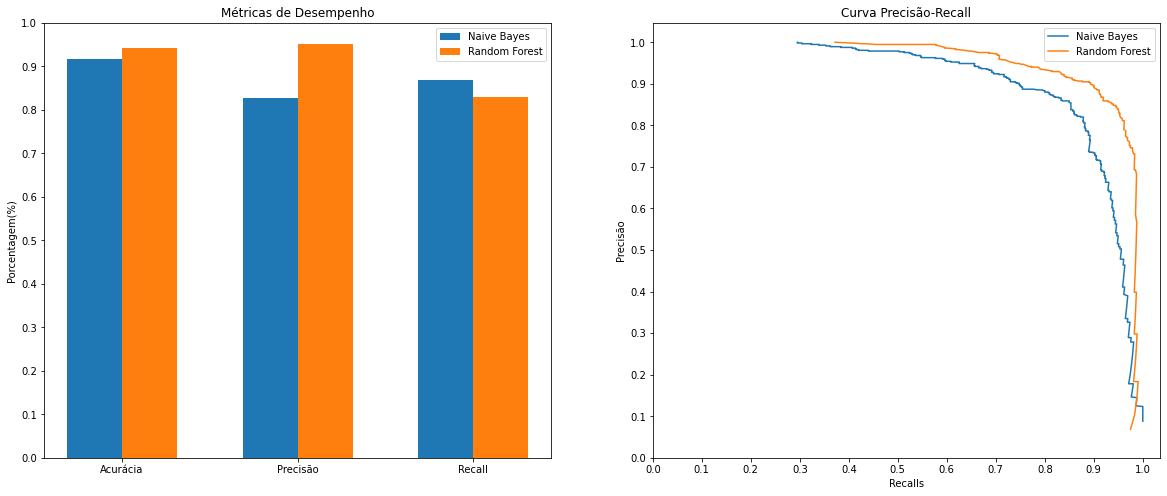

In [25]:
import matplotlib.pyplot as plt

models_num = len(models)

fig, axes = plt.subplots(1,2, figsize=(20,8))

bars_ax, curves_ax = axes

bar_width = 0.05
label_dist = 1.6*models_num*bar_width
bar_label_pos = np.arange(0, 3*label_dist, label_dist)

for idx, model_name, (accuracy, precision, recall, precisions_list, recalls_list) in zip(range(models_num), model_names, results):
    
    x = [pos - 0.5*(models_num-1)*bar_width + idx*bar_width for pos in bar_label_pos]
    y = [accuracy, precision, recall]
    bars_ax.bar(x, y, width = bar_width, label=model_name)
    
    curves_ax.plot(precisions_list, recalls_list, label=model_name)

bars_ax.set_xticks(bar_label_pos)
bars_ax.set_xticklabels(['Acurácia', 'Precisão', 'Recall'])
bars_ax.set_ylabel('Porcentagem(%)')
bars_ax.set_yticks(np.arange(0, 1.1, 0.1))
bars_ax.set_title('Métricas de Desempenho')
bars_ax.legend()

curves_ax.set_xlabel('Recalls')
curves_ax.set_ylabel('Precisão')
curves_ax.set_xticks(np.arange(0, 1.1, 0.1))
curves_ax.set_yticks(np.arange(0, 1.1, 0.1))
curves_ax.set_title('Curva Precisão-Recall')
curves_ax.legend()

fig.show()

# Análise dos Resultados

À esquerda, temos as métricas gerais dos modelos, e à direita temos a curva de precisão por revocação.

Primeiramente, é notável que o Random Forest superou o Naive Bayes tanto em acurácia geral quanto em precisão, tendo um resultado especialmente mais alto em precisão. A única métrica em que ele foi inferior foi a revocação, e mesmo nela a diferença não foi de menos de 5%.

É importante ressaltar que sabemos que existe um tradeoff entre precisão e recall e, para este problema específico, é interessante que a precisão seja mais relevante que o recall:

* Quanto maior a precisão, menor o número de falsos positivos, ou seja, mensagens de interesse (hams) sendo classificadas como spams.
* Quanto maior o recall, menor o número de falsos negativos, ou seja, spams sendo classificados como mensagens de interesse (hams).
* Uma maior precisão geralmente vem sob o custo de um menor recall e vice versa.

Para um usuário, o risco que um baixo recall oferece, que é o de que alguns spams ainda apareçam na caixa de mensagens, é muito menor que o risco que uma baixa precisão oferece, que é o de uma mensagem importante ser detectada como spam e descartada.

Nesse quesito, o Random Forest é superior ao Naive Bayes, que possui maior recall que precisão.

Observemos agora as curvas à direita. Elas representam o tradeoff da precisão pela revocação de cada modelo em diferentes thresholds. Desse modo, uma maior área debaixo da curva indica ambos precisão e recall altos relativamente no modelo. Observe como a curva do Random Forest se encontra completamente acima da curva do Naive Bayes, ficando abaixo apenas em alguns pontos mais à direita de extrema priorização do recall em relação à revocação. Isso demonstra que, na esmagadora maioria dos thresholds, o tradeoff de precisão por revocação do Random Forest é menor que o do Naive Bayes, indicando maiores valores para ambos no Random Forest mesmo considerando as classes desbalanceadas.

Com isso, é evidente que o Random Forest possui um desempenho geral superior ao Naive Bayes na classificação de hams e spams em mensagens de SMS. 